# Problem1 Entropy and information gain

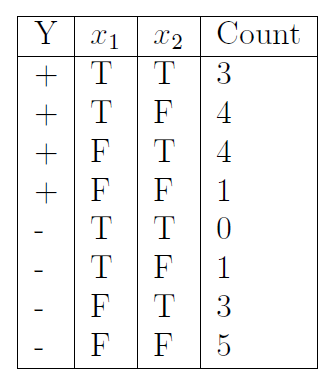

1)
What is the sample entropy, H(Y ) from this training data

In [1]:
import math

In [2]:
y_total=3+4+4+1+1+3+5
y_p=3+4+4+1
y_n=1+3+5

In [3]:
H_y=-(y_p/y_total*math.log2(y_p/y_total)+y_n/y_total*math.log2(y_n/y_total))
print(H_y)

0.9852281360342516


1) What are the information gains for branching on variables x1 and x2

In [4]:
x1_T_count=3+4+1

x1_F_count=4+1+3+5

In [5]:
cond_entro_x1=-(x1_T_count/y_total*(7/x1_T_count*math.log2(7/x1_T_count)+1/x1_T_count*math.log2(1/x1_T_count))+x1_F_count/y_total*(5/x1_F_count*math.log2(5/x1_F_count)+8/x1_F_count*math.log2(8/x1_F_count)))
print(cond_entro_x1)

0.8021234003330552


In [6]:
ig_x1=H_y-cond_entro_x1

In [7]:
x2_T_count=3+4+3
x2_F_count=4+1+1+5

In [8]:
cond_entro_x2=-(x2_T_count/y_total*(7/x2_T_count*math.log2(7/x2_T_count)+3/x2_T_count*math.log2(3/x2_T_count))+x2_F_count/y_total*(5/x2_F_count*math.log2(5/x2_F_count)+6/x2_F_count*math.log2(6/x2_F_count)))
print(cond_entro_x2)

0.9403448246930214


In [9]:
ig_x2=H_y-cond_entro_x2

In [10]:
ig_x1

0.18310473570119645

In [11]:
ig_x2

0.04488331134123025

3) Draw the deicion tree that would be learned by the ID3 algorithm without pruning from
this training data

# Problem 2 Navie Bayesian classification

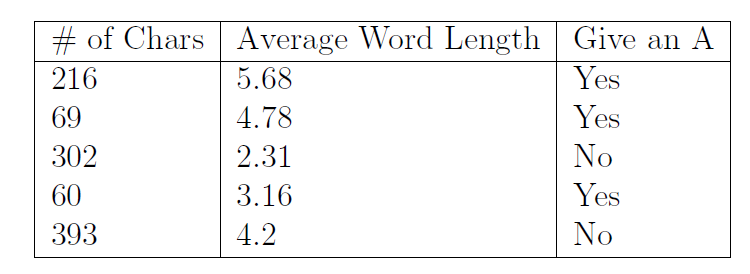

(a) What are the class priors, P(A = Y es); P(A = No)?

In [12]:
P_yes=3/5
P_no=2/5

(b) Find the parameters of the Gaussians necessary to do **Gaussian Naive Bayes classication**
on this decision to give an A or not. Standardize the features first over all the data together
so that there is no unfair bias towards the features of different scales

In [4]:
import pandas as pd
import numpy as np

In [14]:
features={}
features['char_num']=[216,69,302,60,393]
features['word_len']=[5.68,4.78,2.31,3.16,4.2]

In [15]:
df_raw=pd.DataFrame(features)

In [16]:
df=(df_raw-df_raw.mean(axis=0))/df_raw.std(axis=0)

In [17]:
df

,char_num,word_len
0,0.055091,1.247714
1,-0.957199,0.568789
2,0.647314,-1.294484
3,-1.019176,-0.653277
4,1.273970,0.131259


In [18]:
inx_A=[0,1,3]
x1_A=df.iloc[inx_A,0]
x2_A=df.iloc[inx_A,1]
x1_A_mean=x1_A.mean()
x1_A_std=x1_A.std()
x2_A_mean=x2_A.mean()
x2_A_std=x2_A.std()

In [19]:
inx_B=[2,4]
x1_B=df.iloc[inx_B,0]
x2_B=df.iloc[inx_B,1]
x1_B_mean=x1_B.mean()
x1_B_std=x1_B.std()
x2_B_mean=x2_B.mean()
x2_B_std=x2_B.std()

(c) Using your response from the prior question, determine if an essay with 242 characters
and an average word length of 4.56 should get an A or not (3pts).

In [20]:
test=pd.Series([242,4.56])

In [21]:
test_norm=(test.values-df_raw.mean(axis=0).values)/df_raw.std(axis=0).values

In [22]:
test_norm

array([0.23413502, 0.40282904])

In [23]:
def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

In [24]:
P_x1=gaussian(test_norm[0],x1_A_mean,x1_A_std)

In [25]:
P_x2=gaussian(test_norm[1],x2_A_mean,x2_A_std)

In [26]:
P_x1*P_x2*P_yes

0.05743178074713089

In [27]:
P_x1=gaussian(test_norm[0],x1_B_mean,x1_B_std)

In [28]:
P_x2=gaussian(test_norm[1],x2_B_mean,x2_B_std)

In [29]:
P_x1*P_x2*P_no

0.023070889652312816

3. Consider the following questions pertaining to a k-Nearest Neighbors algorithm (1pt):
(a) How could you use a validation set to determine the user-dened parameter k?

# Problem 3 Logistic regression

**Iris dataset**
- 50 samples from each of three species of Iris
- Four features
- use just the rst 2 features, width and length of the sepals

In [5]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [6]:
iris=load_iris()

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
X=iris.data[:,:2]
y=(iris.target!=0)*1

np.random.seed(42)
inx=np.random.permutation(len(X))
X=X[inx]
y=y[inx]

In [9]:
def split_standard(X,y,ratio):
    ## Step 1 split the data
    l=len(X)
    X_train=X[:round(ratio*l),:]
    y_train=y[:round(ratio*l)]
    
    X_test=X[round(ratio*l):,:]
    y_test=y[round(ratio*l):]
    
    mean=X_train.mean(axis=0)
    std=X_train.std(axis=0,ddof=1)
    
    X_training=(X_train-mean)/std
    X_training=np.c_[np.ones((len(X_training),1)),X_training]
    X_testing=(X_test-mean)/std
    X_testing=np.c_[np.ones((len(X_testing),1)),X_test]
    return X_training,y_train,X_testing,y_test

In [10]:
def cross_entropy(X,y,ethta):
    line=np.dot(X,ethta)
    p=(1/(1+np.exp(-line)))+1e-15   ## to avoid 0log(0)
    f=-(y*np.log(abs(p))+(1-y)*np.log(abs(1-p))) ## y is the real occurrence of the event determinded by dataset
    return f.mean()

In [11]:
def batch_GD(X,y,iters=10000,res=2e-23,batch_size=10,lr=0.01):
    
    ## Initialize model parameters
    ethta=np.random.uniform(-1,1,X.shape[1])
    cost=cross_entropy(X,y,ethta)
    
    ## Initialize variables for epoch
    error=1
    i=0
    cost_epoch=[]
    cost_epoch.append(cost)
    
    ## Each epoch, the ethta is updated by running all the batches 
    while i<=iters and error>res:
        
        ## Initialize varialbes for batch
        cost_batch=[]
        sample_size=batch_size*int(len(X)/batch_size)
        for inx in range(0,sample_size,batch_size):
            X_batch=X[inx:inx+batch_size,:]
            y_batch=y[inx:inx+batch_size]
            
            ethta=ethta-lr*X_batch.T@((1/(1+np.exp(-X_batch@ethta)))-y_batch)/len(X_batch)
            
            cost=cross_entropy(X_batch,y_batch,ethta)
            cost_batch.append(cost)
        
        
        cost_epoch.append(sum(cost_batch)/len(cost_batch))
        error=abs(cost_epoch[-2]-cost_epoch[-1])/cost_epoch[-2]
        i+=1

    
    return ethta,cost_epoch
        
    
    

In [12]:
X_train,y_train,X_test,y_test=split_standard(X,y,ratio=0.67)

In [13]:
ethta,cost=batch_GD(X_train,y_train)

In [14]:
ethta

array([ 4.01580931,  7.26389209, -4.92230561])

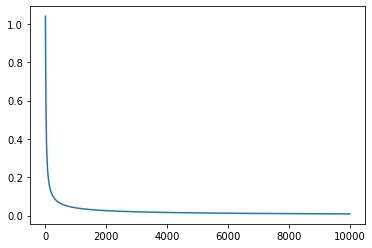

In [15]:
plt.plot(cost)

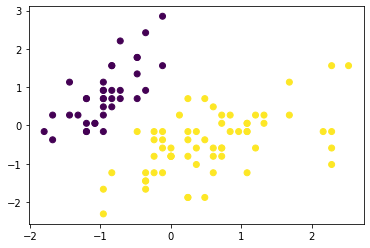

In [41]:
plt.scatter(X_train[:,1],X_train[:,2],c=y_train)



### Implement in sklearn

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lgr=LogisticRegression(penalty='none',solver='lbfgs',max_iter=10000)

In [44]:
X_all=(X-X.mean(axis=0))/X.std(axis=0)
X_train_all=np.c_[np.ones((len(X_all),1)),X_all]

In [45]:
lgr.fit(X_train_all,y)

LogisticRegression(max_iter=10000, penalty='none')

# Problem 3 Logistic regression on spam email classification

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
email=pd.read_csv('spambase.data',header=None)

In [18]:
email.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [19]:
email=email.values

In [20]:
X=email[:,:-1]
y=email[:,-1]

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=42)
mean=X_train.mean(axis=0)
std=X_train.std(axis=0)
X_train=(X_train-mean)/std
X_test=(X_test-mean)/std

In [23]:
ethta,cost=batch_GD(X_train,y_train,iters=1500,res=2e-23,batch_size=100,lr=0.01)

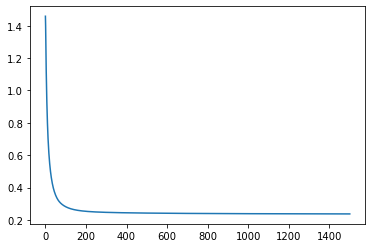

In [24]:
plt.plot(cost)

In [29]:
def predict(X,ethta):
    p=1/(1+np.exp(-X@ethta))
    y=(p > 0.5).astype(int)
    return y
   

Computes the following statistics using the testing data results:  
(a) Precision  
(b) Recall  
(c) F-measure  
(d) Accuracy  

In [41]:
def performance(y_true,y_pre):
    FP=np.sum(y_pre[y_pre==1]-y_true[y_pre==1])
    FN=(y_true[y_true==1]-y_pre[y_true==1]).sum()
    
    TN=y_pre[y_pre==0].sum()-FN
    TP=y_pre[y_pre==1].sum()-FP
    
    
    
    acc=(TP+TN)/(TP + TN + FP + FN)
    prec=TP/(TP+FN)
    recall=TP/(TP+FP)
    F_score=f1_score = 2 * prec * recall / (prec + recall)
    return acc,prec,recall,F_score

In [32]:
y_pre_test=predict(X_test,ethta)

In [35]:
y_pre_test

array([0, 0, 0, ..., 0, 1, 0])

In [36]:
y_test

array([0., 0., 0., ..., 0., 1., 0.])

In [42]:
acc,prec,recall,F_score=performance(y_test,y_pre_test)

In [43]:
print(acc,prec,recall,F_score)

0.7938311688311688 0.8850393700787401 0.9123376623376623 0.8984812150279776


# Prob 4 Naive Bayes Classifer on spam email classification

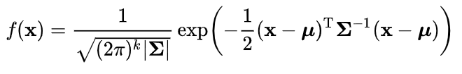
**<font color='red'>Naive Bayes assums the features are independent</font>**

In [57]:
## Split data by y value
def condi_y(X,y):
    y_p=y_train==1
    y_n=y_train==0
    X_p=X[y_p,:]
    X_n=X[y_n,:]
    return X_p,y_p,X_n,y_n

In [58]:
## Find mean and std of features
def mean_std(X):
    mean=X.mean(axis=0)
    #cov_matrix=(X-mean).T@(X-mean)
    std=X.std(axis=0)
    return mean, std

In [59]:
## https://peterroelants.github.io/posts/multivariate-normal-primer/
##  
def multi_gaussian(x, mean,std):
    k=x.shape[1]
    std_dia=np.diag(std)
    tem1=(np.linalg.det(std_dia)+1e-10)**(-1/2)

    
    #tem2=np.exp(-.5*(x-mean)@np.linalg.inv(cov+1e-10*np.eye(cov.shape[0]))@(x-mean).T)
    tem2=np.exp(-.5*(x-mean)@std_dia@(x-mean).T)
    return (2*np.pi)**(-k/2)*tem1*tem2
    

In [60]:
def pred(x,X,y):
    X_p,y_p,X_n,y_n=condi_y(X,y)
    mean_p,std_p=mean_std(X_p)
    mean_n,std_n=mean_std(X_n)
    
    
    pred_y_n=multi_gaussian(x,mean_n,std_n)*len(y_n)/len(y)
    pred_y_p=multi_gaussian(x,mean_p,std_p)*len(y_p)/len(y)
    return pred_y_n,pred_y_p

In [61]:
pred_y_n,pred_y_p=pred(X_test,X_train,y_train)

In [62]:
pred=np.diag(pred_y_n)-np.diag(pred_y_p)

In [63]:
pr=np.where(pred>0,1,0)

In [64]:
y_test

array([0., 0., 0., ..., 0., 1., 0.])

In [65]:
accuracy=1-np.abs(pr-y_test).sum()/len(pr)

In [66]:
accuracy

0.7144719687092569

# Prob 5 Decision tree

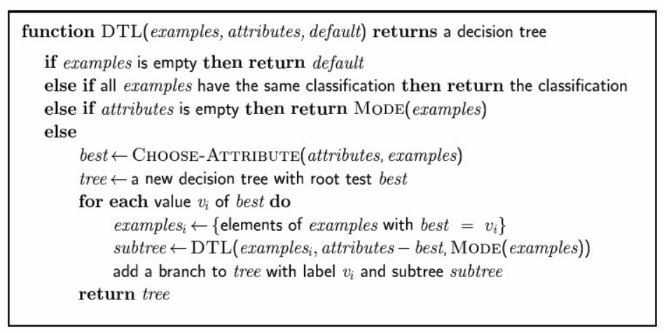

In [ ]:
# reference: http://www.cse.unsw.edu.au/~billw/cs9414/notes/ml/06prop/id3/id3.html
# https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/

In [44]:
## compute entropy in numpy
def entropy(data):
    targets=data['target']
    elements,counts = np.unique(target_col,return_counts = True)  
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) 
                      for i in range(len(elements))])  
    return entropy 

# Calculate the information Gain for a feature
def InfoGain(data,attribute_name,target_name="y"):           
     
    total_entropy = entropy(data[target_name])  
      
         
    #Calculate the values and the corresponding counts for the split attribute   
    vals,counts= np.unique(data[attribute_name],return_counts=True)  
      
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*
                               entropy(data.where(data[attribute_name]==vals[i]).dropna()[target_name]) 
                               for i in range(len(vals))])  
      
    #return the information gain  
    return total_entropy - Weighted_Entropy 

In [45]:
## compute entropy in dataframe
def entropy(labels):
    prob=labels.value_counts(normalize=True)
    entropy=(-prob*np.log2(prob)).sum()
    
    return entropy

In [46]:
def best_feature(feature,data,lable_col=57):
    
    labels=data[lable_col]
    grop_lab1=labels[data[feature]==0]
    grop_lab2=labels[data[feature]==1]

    entropy1=entropy(grop_lab1)
    entropy2=entropy(grop_lab2)

    total_entropy=grop_lab1.size/labels.size*entropy1
                +grop_lab2.size/labels.size*entropy2
    
    current_entropy=entropy(labels)
    feature_IG=current_entropy-total_entropy
    
    return feature_IG 

IndentationError: unexpected indent (<ipython-input-46-645c81916376>, line 11)

In [47]:
def DCT(data,originaldata,features,lable_col=57,parent_node_class=None):
    labels=data[57]
    if len(labels.unique())<=1:
#         print("Same classification")
        return labels.mode()
    
    elif data.size==0:
        return originaldata[57].mode()
    
    elif len(features) ==0:  
        return parent_node_class 
    else:      
        
        
       # The "group number" of parent node
        parent_node_class=data[57].mode()
        
        # select best feature to split the dataset by calculating the information gain
        
        
        feature_IG=pd.Series([best_feature(feature,data,lable_col) for feature in features])
        best=features[feature_IG.idxmax()]
        tree = {best:{}} # create tree structure and the root is the best feature gained from the first run

        # remove the best feature from feature space
        features_cat_update=features.drop(best)
        
        # split the data by feature values
        
        for value in data[best].unique():
            sub_data=data[data[best]==value].dropna()
            subtree = DCT(sub_data,dataset,features_cat_update,lable_col,parent_node_class)

            tree[best][value] = subtree 
        
        return tree  

In [48]:
def predict(query,tree,default = 1):  
    
    for key in list(query.keys()):  
        if key in list(tree.keys()):  
            
            try:  
                result = tree[key][query[key]]   
            except:  
                return default  
    
            result = tree[key][query[key]]  
            
            if isinstance(result,dict):  
                return predict(query,result)  
            else:  
                return result 